
Menu:
1. Read CSV files
2. Analyze population data (2022)
3. Analyze top 5 population changes
4. Plot normalized population development
5. Compare population data between 2019 and 2022
6. Exit
Choose an option: 2
Error: You must run menu option 1 first to read the CSV files.

Menu:
1. Read CSV files
2. Analyze population data (2022)
3. Analyze top 5 population changes
4. Plot normalized population development
5. Compare population data between 2019 and 2022
6. Exit
Choose an option: 1
Enter the name of the 2019 CSV file (or press ENTER to use default 'population data_2019.csv'): 
Enter the name of the 2022 CSV file (or press ENTER to use default 'population data_2022.csv'): 
First two rows of population_data_2019:
['\ufeffCOUNTRY', '2019', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']
['Belgium', '11455519', '11507338', '11661206', '11757990', '11835820', '11894881', '11927324', '11926987', '1190

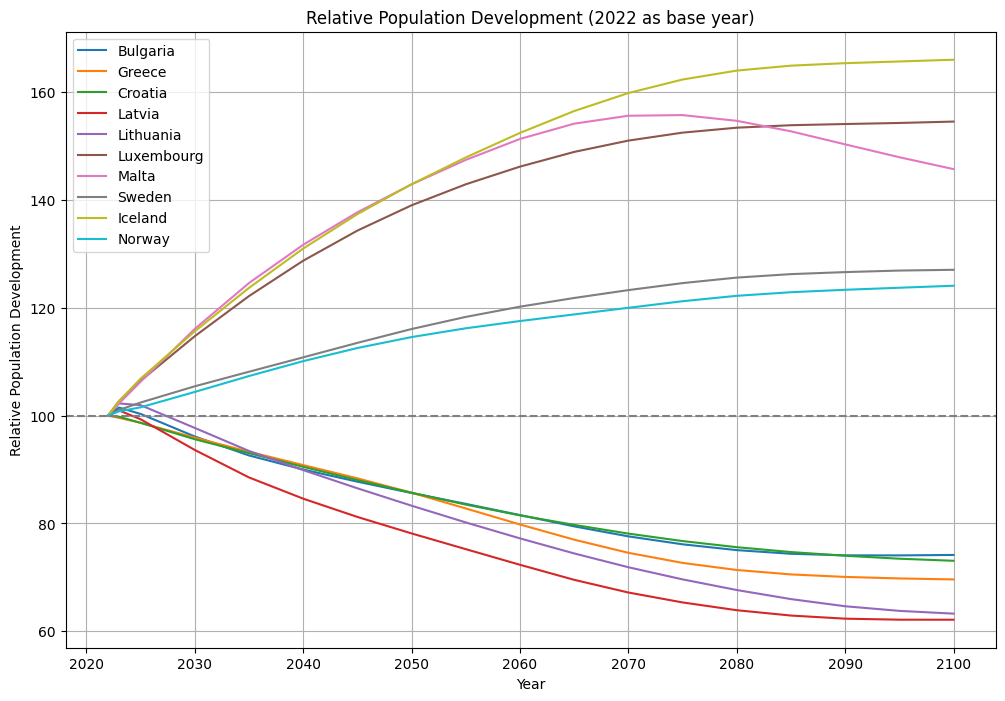


Menu:
1. Read CSV files
2. Analyze population data (2022)
3. Analyze top 5 population changes
4. Plot normalized population development
5. Compare population data between 2019 and 2022
6. Exit
Choose an option: 5

Country-wise average percentage difference between 2019 and 2022 datasets:
Belgium: 5.10%
Bulgaria: 3.90%
Czechia: 2.60%
Denmark: 0.48%
Germany: 2.26%
Estonia: 7.67%
Ireland: -4.46%
Greece: -6.79%
Spain: 1.07%
France: 0.28%
Croatia: -1.56%
Italy: -1.50%
Cyprus: -5.75%
Latvia: 4.90%
Lithuania: 7.61%
Luxembourg: 17.73%
Hungary: 0.67%
Malta: 9.93%
Netherlands: 3.01%
Austria: 2.41%
Poland: 2.81%
Portugal: 4.93%
Romania: 7.23%
Slovenia: 2.44%
Slovakia: 1.78%
Finland: 2.73%
Sweden: -0.99%
Iceland: 6.63%
Norway: -2.25%
Switzerland: -5.03%

Menu:
1. Read CSV files
2. Analyze population data (2022)
3. Analyze top 5 population changes
4. Plot normalized population development
5. Compare population data between 2019 and 2022
6. Exit
Choose an option: 6


In [10]:
import csv
analysis_data = []
import matplotlib.pyplot as plt

def read_file(file_name):
    """
    Opens a CSV file named file_name, reads its contents into a two-dimensional list, and returns this list.

    Args:
    file_name (str): The name of the CSV file to read.

    Returns:
    list: A two-dimensional list containing the CSV file data.
    """
    data = []
    try:
        with open(file_name, mode='r', newline='', encoding='utf-8') as file:
            csv_reader = csv.reader(file, delimiter=';')
            for row in csv_reader:
                data.append(row)
    except FileNotFoundError:
        print(f"Error: The file {file_name} was not found.")
    return data

def menu_option_1():
    """
    Handles menu option 1: Reads the specified CSV files into two lists.
    """
    global population_data_2019, population_data_2022

    # Prompt the user for the CSV file names
    file_2019 = input("Enter the name of the 2019 CSV file (or press ENTER to use default 'population data_2019.csv'): ")
    if not file_2019:
        file_2019 = 'population data_2019.csv'

    file_2022 = input("Enter the name of the 2022 CSV file (or press ENTER to use default 'population data_2022.csv'): ")
    if not file_2022:
        file_2022 = 'population data_2022.csv'

    # Read the files into the lists
    population_data_2019 = read_file(file_2019)
    population_data_2022 = read_file(file_2022)

    # Print the first two rows of each list to verify the contents
    print("First two rows of population_data_2019:")
    for row in population_data_2019[:2]:
        print(row)

    print("\nFirst two rows of population_data_2022:")
    for row in population_data_2022[:2]:
        print(row)

# Initialize global variables
population_data_2019 = []
population_data_2022 = []

def min_value(num_list):
    """
    Returns the lowest value in a numerical list.

    Args:
    num_list (list): A list of numerical values.

    Returns:
    float: The lowest value in the list.
    """
    if not num_list:
        return None
    min_val = num_list[0]
    for num in num_list:
        if num < min_val:
            min_val = num
    return min_val

def max_value(num_list):
    """
    Returns the highest value in a numerical list.

    Args:
    num_list (list): A list of numerical values.

    Returns:
    float: The highest value in the list.
    """
    if not num_list:
        return None
    max_val = num_list[0]
    for num in num_list:
        if num > max_val:
            max_val = num
    return max_val

def analyze_data_task2(data):
    """
    Analyzes population data and returns a new list with analysis results.

    Args:
    data (list): A two-dimensional list containing population data from 2022 to 2100.

    Returns:
    list: A two-dimensional list with analysis results for each country.
    """
    analysis = []

    for row in data[1:]:
        country = row[0]
        population_values = [int(value) for value in row[2:]]  # Convert population figures to integers
        years = list(range(2022, 2101))  # Years from 2022 to 2100

        min_pop = min_value(population_values)
        min_year = years[population_values.index(min_pop)]
        max_pop = max_value(population_values)
        max_year = years[population_values.index(max_pop)]
        pop_2022 = int(row[2])
        pop_2100 = int(row[-1])
        pop_development_pct = ((pop_2100 - pop_2022) / pop_2022) * 100

        analysis.append([country, min_pop, min_year, max_pop, max_year, pop_development_pct])

    return analysis
def menu_option_2():
    """
    Handles menu option 2: Analyzes the population data for 2022.
    """
    global population_data_2022, analysis_data

    if not population_data_2022:
        print("Error: You must run menu option 1 first to read the CSV files.")
        return

    analysis_data = analyze_data_task2(population_data_2022)

    print("Analysis complete. Here are the first two rows of the analysis data:")
    for row in analysis_data[:2]:
        print(row)

def analyze_data_task3(analysis_data):
    """
    Analyzes the provided data to find the five countries with the largest expected
    population increase and decrease by 2100.

    Args:
    analysis_data (list): A two-dimensional list containing analysis results from Task 2.

    Returns:
    tuple: Two lists containing the top five countries with the largest population increase
           and decrease.
    """
    sorted_data = sorted(analysis_data, key=lambda x: x[5], reverse=True)  # Sort by population development percentage

    top_5_increase = sorted_data[:5]
    top_5_decrease = sorted_data[-5:]

    return top_5_increase, top_5_decrease
def menu_option_3():
    """
    Handles menu option 3: Analyzes the population data to find the top 5 countries
    with the largest increase and decrease in population by 2100.
    """
    global analysis_data

    if not analysis_data:
        print("Error: You must run menu option 2 first to analyze the population data.")
        return

    top_5_increase, top_5_decrease = analyze_data_task3(analysis_data)

    print("\nTop 5 countries with the largest expected population increase by 2100:")
    print("Country | Lowest Population | Year | Highest Population | Year | Population Increase (%)")
    for row in top_5_increase:
        print(f"{row[0]} | {row[1]} | {row[2]} | {row[3]} | {row[4]} | {row[5]:.2f}")

    print("\nTop 5 countries with the largest expected population decrease by 2100:")
    print("Country | Lowest Population | Year | Highest Population | Year | Population Decrease (%)")
    for row in top_5_decrease:
        print(f"{row[0]} | {row[1]} | {row[2]} | {row[3]} | {row[4]} | {row[5]:.2f}")


def analyze_data_task4(population_data_2022, analysis_data):
    """
    Analyzes the provided population data and creates a normalized data list and a plot.

    Args:
    population_data_2022 (list): The original population data for the year 2022.
    analysis_data (list): The analyzed data from Task 2.

    Returns:
    None
    """
    # Get the top 5 countries with the largest increase and decrease in population
    top_5_increase, top_5_decrease = analyze_data_task3(analysis_data)

    # Combine the top 5 increase and decrease countries
    top_countries = top_5_increase + top_5_decrease

    # Create a list of country names from the combined top countries
    top_country_names = [country[0] for country in top_countries]

    # Initialize a dictionary to store normalized data for top countries
    normalized_data = {}

    # Extract years from the header of population_data_2022
    years = [int(year) for year in population_data_2022[0][1:]]

    # Normalize population data for each top country
    for row in population_data_2022[1:]:
        country = row[0]
        if country in top_country_names:
            population_2022 = int(row[1])
            normalized_population = [(int(pop) / population_2022) * 100 for pop in row[1:]]
            normalized_data[country] = normalized_population

    # Plotting the data
    plt.figure(figsize=(12, 8))

    for country, data in normalized_data.items():
        plt.plot(years, data, label=country)

    # Adding a horizontal line at y=100
    plt.axhline(y=100, color='grey', linestyle='--')

    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Relative Population Development')
    plt.title('Relative Population Development (2022 as base year)')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

def menu_option_4():
    """
    Handles menu option 4: Normalizes and plots the population data for the top 5 countries
    with the largest increase and decrease in population by 2100.
    """
    global population_data_2022, analysis_data

    if not population_data_2022 or not analysis_data:
        print("Error: You must run menu options 1 and 2 first to read and analyze the population data.")
        return

    analyze_data_task4(population_data_2022, analysis_data)


def analyze_data_task5(population_data_2019, population_data_2022):
    """
    Analyzes the difference in population data between 2019 and 2022 datasets.

    Args:
    population_data_2019 (list): The population data for the year 2019.
    population_data_2022 (list): The population data for the year 2022.

    Returns:
    list: A list containing each country and its average percentage difference in population.
    """
    difference_data = []

    # Create dictionaries for quick lookup
    population_dict_2019 = {row[0]: row[1:] for row in population_data_2019[1:]}
    population_dict_2022 = {row[0]: row[1:] for row in population_data_2022[1:]}

    # Years present in the data
    years = [int(year) for year in population_data_2019[0][1:]]

    for country in population_dict_2022:
        if country in population_dict_2019:
            pop_2019 = [int(pop) for pop in population_dict_2019[country]]
            pop_2022 = [int(pop) for pop in population_dict_2022[country]]

            percentage_differences = []
            for pop19, pop22 in zip(pop_2019, pop_2022):
                percentage_diff = ((pop22 - pop19) / pop19) * 100
                percentage_differences.append(percentage_diff)

            average_difference = sum(percentage_differences) / len(percentage_differences)
            difference_data.append([country, average_difference])

    return difference_data

def menu_option_5():
    """
    Handles menu option 5: Analyzes and compares population data between 2019 and 2022 datasets.
    """
    global population_data_2019, population_data_2022

    if not population_data_2019 or not population_data_2022:
        print("Error: You must run menu option 1 first to read the population data files.")
        return

    differences = analyze_data_task5(population_data_2019, population_data_2022)

    print("\nCountry-wise average percentage difference between 2019 and 2022 datasets:")
    for country, avg_diff in differences:
        print(f"{country}: {avg_diff:.2f}%")

def main():
    """
    Main function to display the menu and handle user input.
    """
    while True:
        print("\nMenu:")
        print("1. Read CSV files")
        print("2. Analyze population data (2022)")
        print("3. Analyze top 5 population changes")
        print("4. Plot normalized population development")
        print("5. Compare population data between 2019 and 2022")
        print("6. Exit")

        choice = input("Choose an option: ")

        if choice == '1':
            menu_option_1()
        elif choice == '2':
            menu_option_2()
        elif choice == '3':
            menu_option_3()
        elif choice == '4':
            menu_option_4()
        elif choice == '5':
            menu_option_5()
        elif choice == '6':
            break
        else:
            print("Invalid choice. Please try again.")

# Run the main function
if __name__ == "__main__":
    main()